#  <center><u>Wine Quality Prediction</u></center>

## <u>Abstract:

<p> Wine classification is a difficult task since taste is the least understood of the human senses. A good wine quality
prediction can be very useful in the certification phase, since currently the sensory analysis is performed by human tasters, being
clearly a subjective approach. An automatic predictive system can be integrated into a decision support system, helping the
speed and quality of the performance. Furthermore, a feature selection process can help to analyze the impact of the analytical
tests. If it is concluded that several input variables are highly relevant to predict the wine quality, since in the production process
some variables can be controlled, this information can be used to improve the wine quality</p>

## <u>Introduction:

<p>The aim of this project is to predict the quality of wine on
a scale of 0–10 given a set of features as inputs. The
dataset used is Wine Quality Data set from UCI Machine
Learning Repository. Input variables are fixed acidity,
volatile acidity, citric acid, residual sugar, chlorides, free
sulphur dioxide, total sulphur dioxide, density, pH,
sulphates, alcohol. And the output variable is quality
(score between 0 and 10).We are dealing only with red
wine. We have quality being one of these values: [3, 4, 5,
6, 7, 8]. The higher the value the better the quality. In this
project we will treat each class of the wine separately and
their aim is to be able and find decision boundaries that
work well for new unseen data. These are the classifiers.
In this paper we are explaining the steps we followed to
build our models for predicting the quality of red wine in a
simple non-technical way. We are dealing only with red
wine. We would follow similar process for white wine or
we could even mix them together and include a binary
attribute red/white, but our domain knowledge about wines
suggests that we shouldn’t. Classification is used to
classify the wine as good or bad. Before examining the
data it is often referred to as supervised learning because
the classes are determined.</p>

## <u>Past researches:

<p>Various researches and students have published related
work in national and international research papers, thesis
to understand the objective, types of algorithm they have
used and various techniques for pre-processing.
College of Intelligent Science and Engineering, China has
written a paper on Evaluation and Analysis Model of Wine
Quality Based on Mathematical Model.They have used
various mathematical test to predict the quality of
wine.The Mann-Whitney U test is used to analyze the wine
evaluation results of the two wine tasters, and it is found that the significant difference between the two is small.
Then this paper uses the Cronbach Alpha coefficient
method to analyze the credibility of the two groups of
data.[1]
Paulo Cortez ,Juliana Teixeira,António CerdeiraFernando
AlmeidaTelmo MatosJosé Reis wrote a paper on wine
Quality assesment using Data Mining techniques.In this
paper,they proposed a data mining approach to predict
wine preferences that is based on easily available
analytical tests at the certification step. A large dataset was
considered with white vinho verde samples from the
Minho region of Portugal. Wine quality is modeled under a
regression approach, which preserves the order of the
grades. 95% accuracy was obtained using these data
mining techniques.[2]
The study of this paper was done at International Journal
of Intelligent Systems and Applications in Engineering and
this paper was published on 3rd September 2016. The
main objective of this research paper was to predict wine
quality based on physicochemical data. In this study, two
large separate data sets which were taken from UC Irvine
Machine Learning Repository were used. The instances
were successfully classified as red wine and white wine
with the accuracy of 99.5229% by using Random Forests
Algorithm.[3]
</p>

## <u>Other Work:

<p>Dataset/Source: Kaggle
    <a href="https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009">click here</a>
Structured/Unstructured data: Structured
Data in CSV format.</p>

##  <u>Dataset Description:

<p> The dataset is related 
to red wine of the Portuguese "Vinho Verde" wine.Due to privacy and logistic issues, only 
physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape 
types, wine brand, wine selling price, etc.).
These datasets can be viewed as classification or 
regression tasks. The classes are ordered and not balanced 
(e.g. there are many more normal wines than excellent or 
poor ones). Outlier detection algorithms could be used to 
detect the few excellent or poor wines. Also, we are not 
sure if all input variables are relevant. So it could be 
interesting to test feature selection methods.
 </p>

<li>fixed acidity</li>
<li>volatile acidity</li>
<li>citric acid</li>
<li>residual sugar</li>
<li>chlorides</li>
<li>free sulfur dioxide</li>
<li>total sulfur dioxide</li>
<li>density</li>
<li>pH</li>
<li>sulphates</li>
<li>alcohol</li>
<li>quality (score between 0 to 10)</li>


In [1]:
#Importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### <i><b><u>Loading Dataset:

In [35]:
wine = pd.read_csv("WineQT.csv")

In [4]:
# Checking the dimensions
wine.shape

(1143, 13)

In [5]:
# first five values
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
wine.isnull()
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### <B><i><u> Analyzing dependency of quality over other attributes:

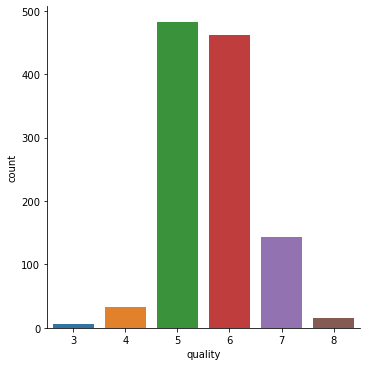

In [8]:
sns.catplot(x='quality',data=wine,kind='count',hue=None,height=5)

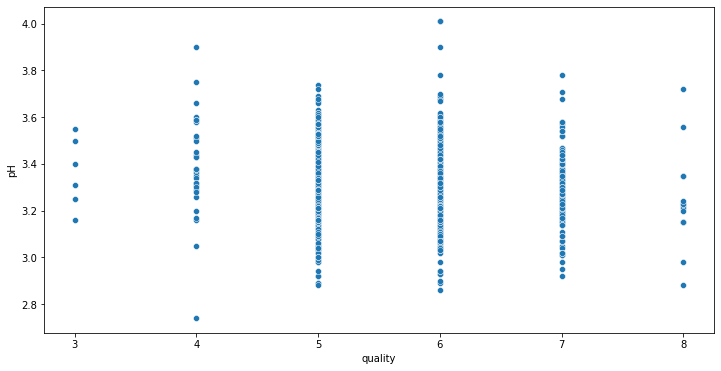

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'quality', y = 'pH',data = wine)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

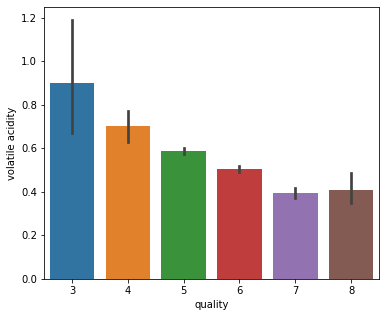

In [9]:
plt.figure(figsize=(6,5))
sns.barplot(x='quality',y='volatile acidity',data=wine)
#inversely propotional

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

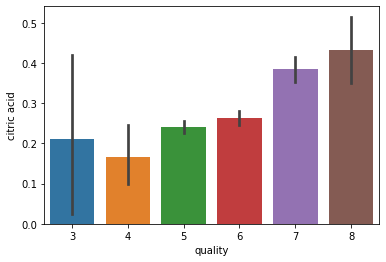

In [10]:
sns.barplot(x='quality',y='citric acid',data=wine)
#directly propotinal

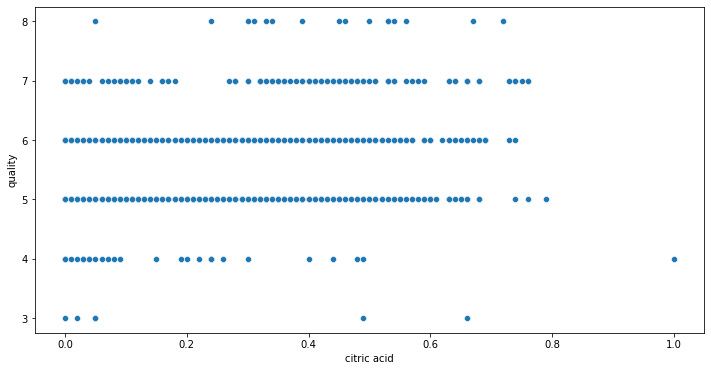

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'citric acid', y = 'quality',data = wine)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'citric acid', y = 'pH',data = wine)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

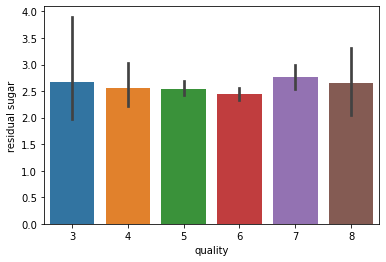

In [12]:
sns.barplot(x='quality',y='residual sugar',data=wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

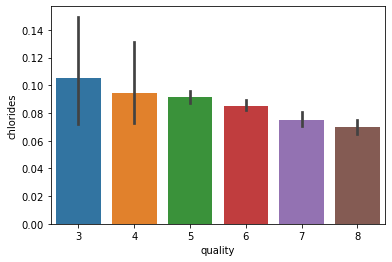

In [13]:
sns.barplot(x='quality',y='chlorides',data=wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

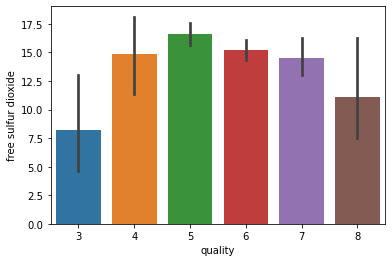

In [14]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

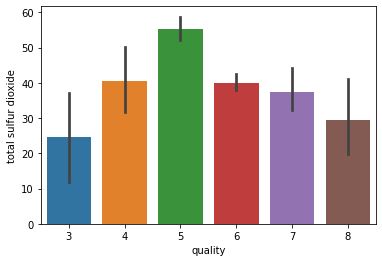

In [15]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

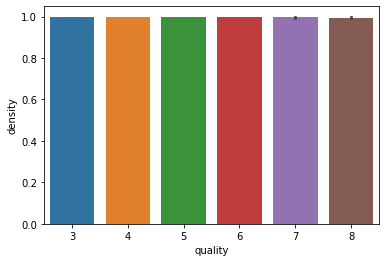

In [16]:
sns.barplot(x='quality',y='density',data=wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

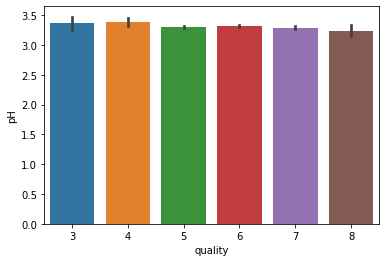

In [17]:
sns.barplot(x='quality',y='pH',data=wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

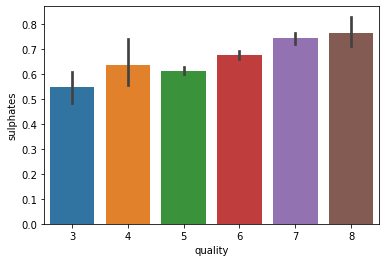

In [18]:
sns.barplot(x='quality',y='sulphates',data=wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

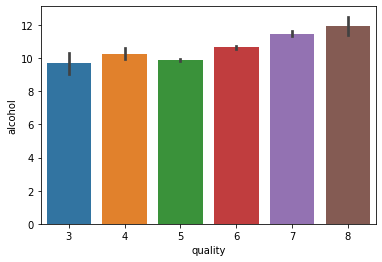

In [19]:
sns.barplot(x='quality',y='alcohol',data=wine)

<Figure size 1080x576 with 0 Axes>

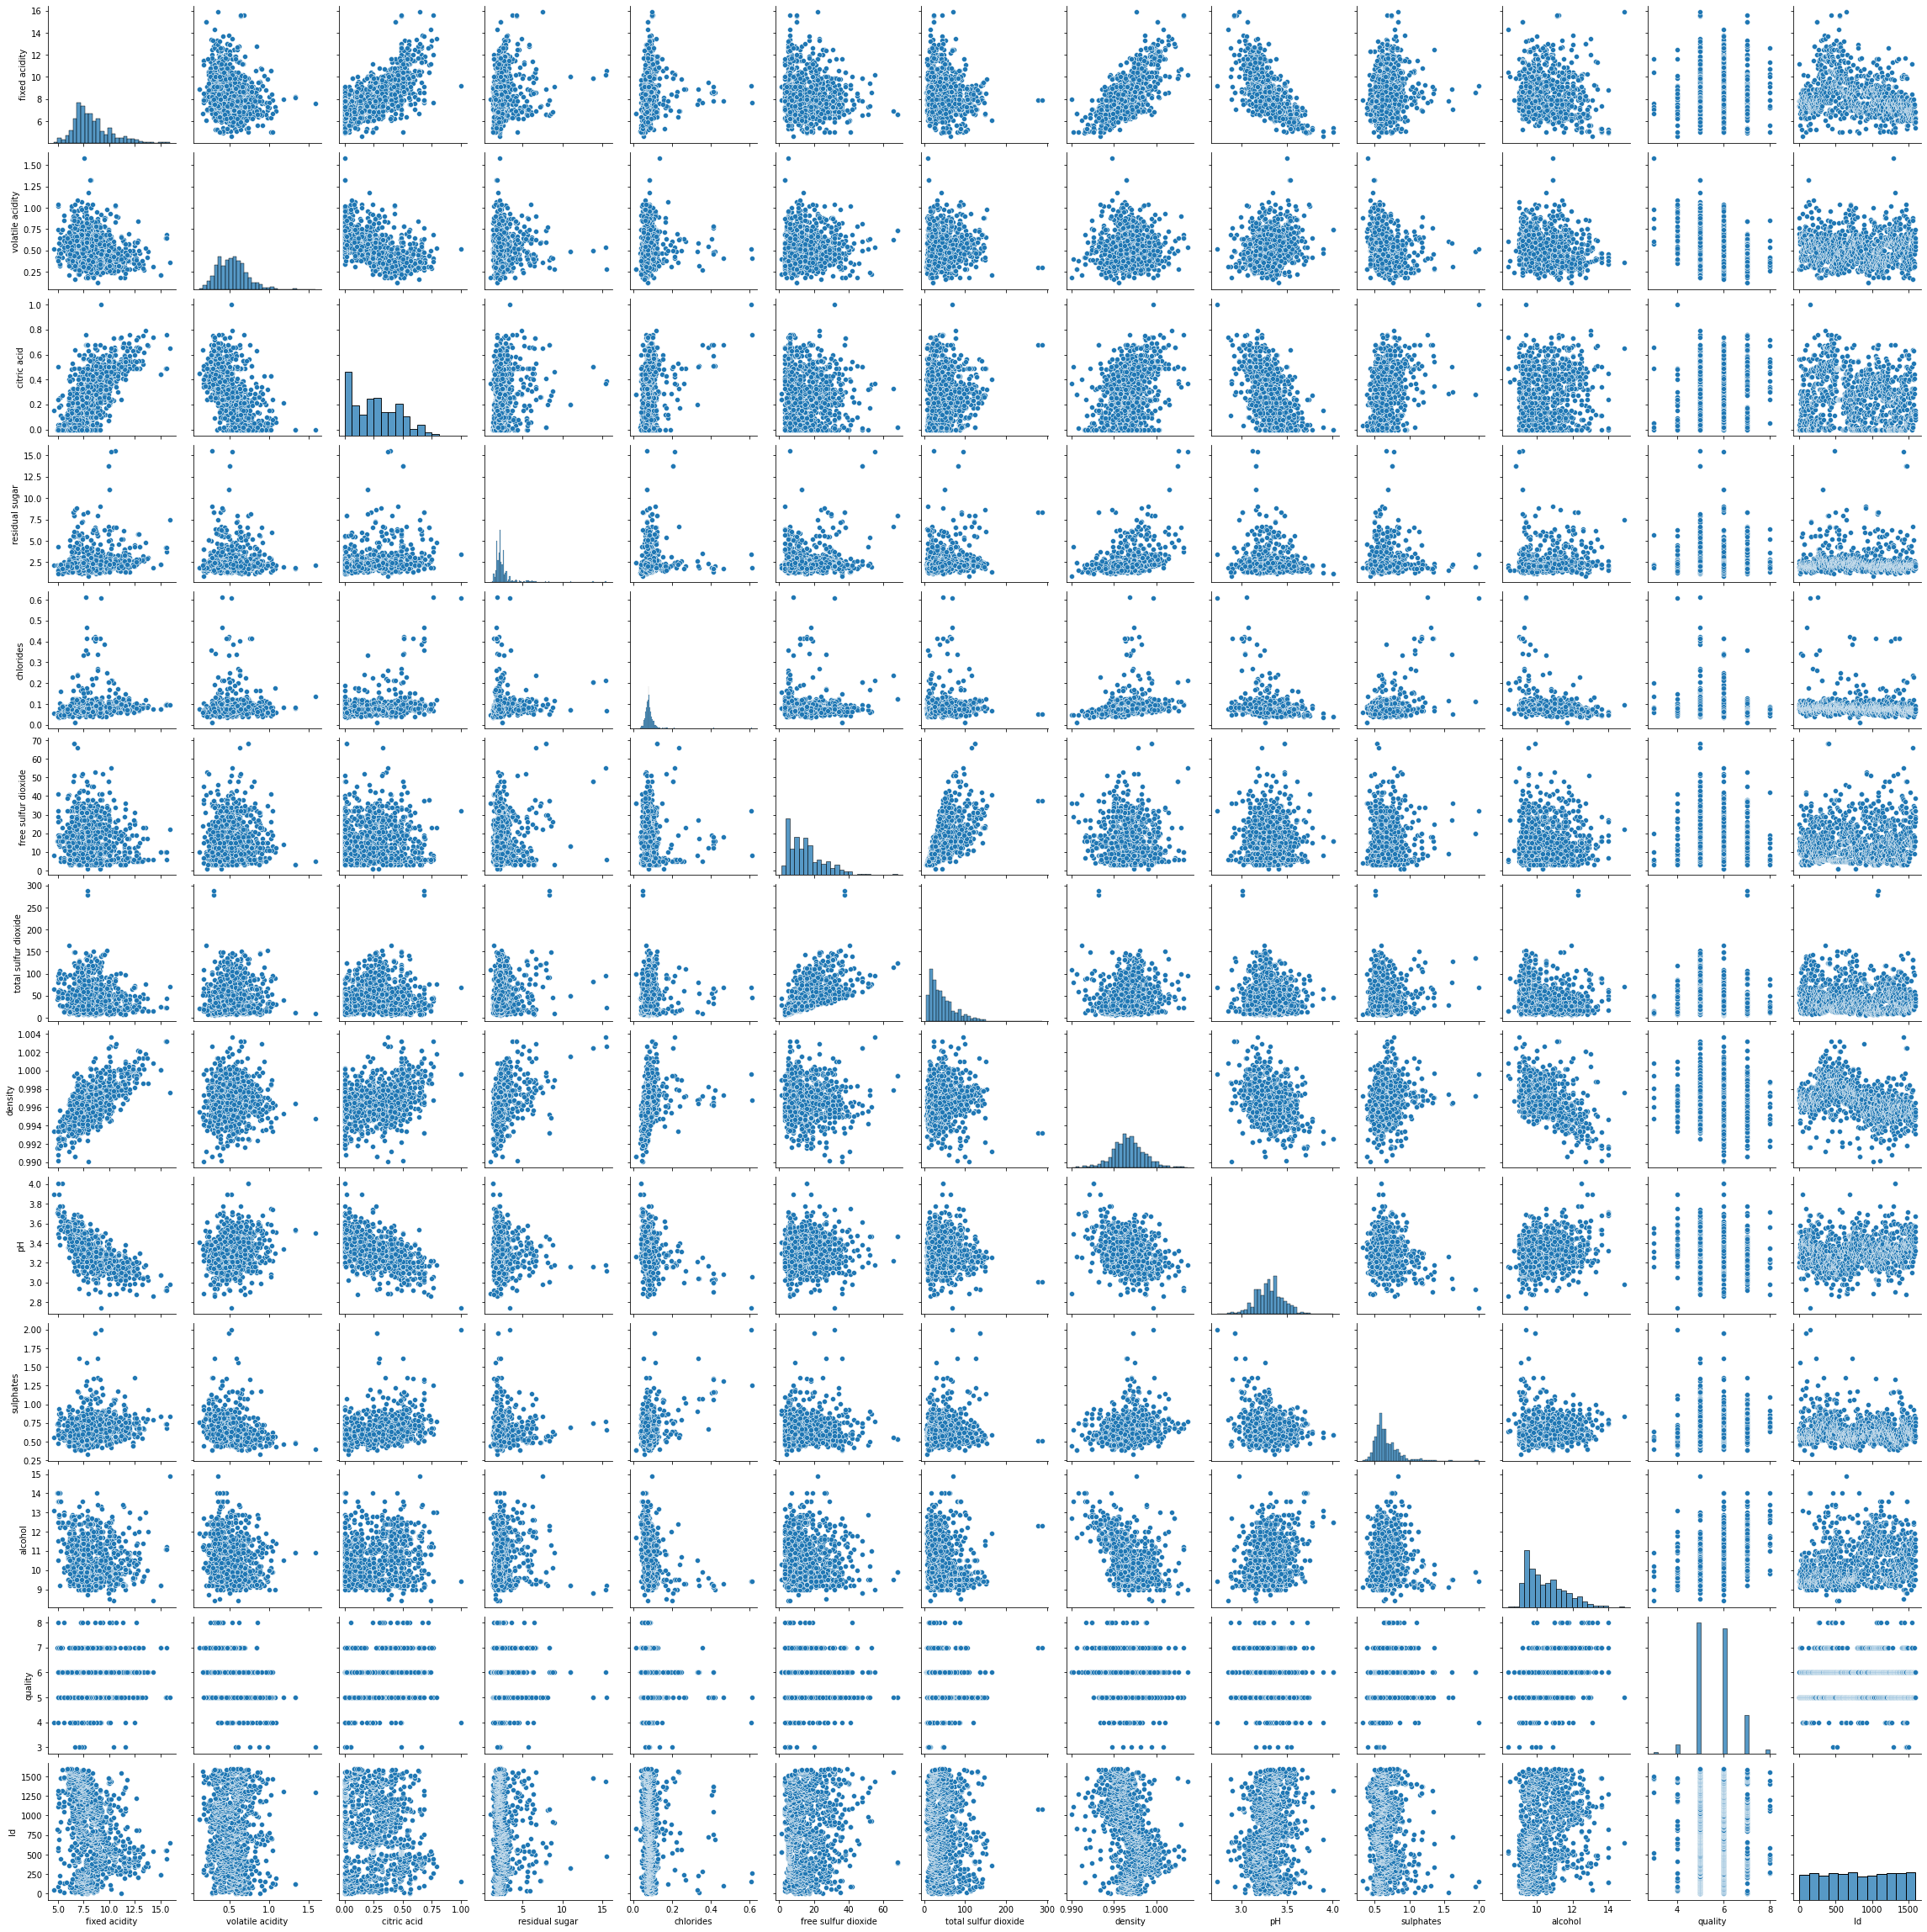

In [20]:
plt.figure(figsize=(15,8))
sns.pairplot(wine)
plt.show()

### <b><i><u>Finding Correlation:

<AxesSubplot:>

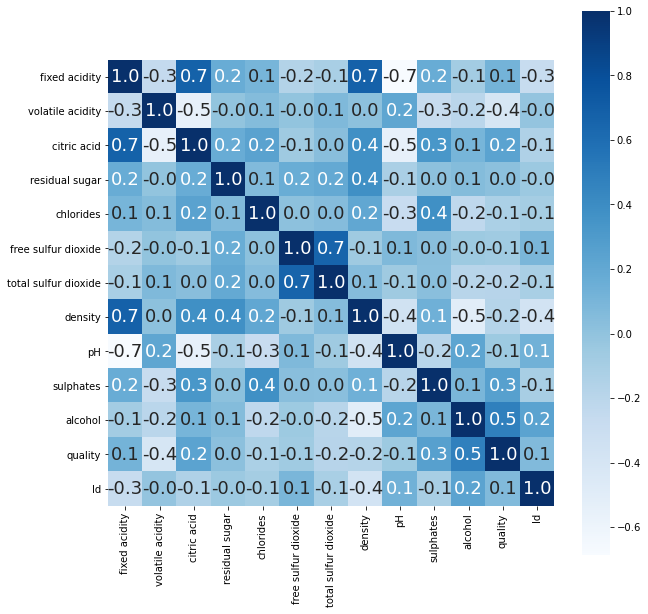

In [21]:
correlat = wine.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlat, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':18}, cmap='Blues')
#1. Positive correlation: directly propotional
#2. Negative correlation: Inversely Propotional


### <b><i><u> Data Preprocessing:

In [22]:
X = wine.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

### <B><i><u> Label Binarization:

In [32]:
Y = wine['quality'].apply(lambda Y_value : 1 if Y_value>=7 else  0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

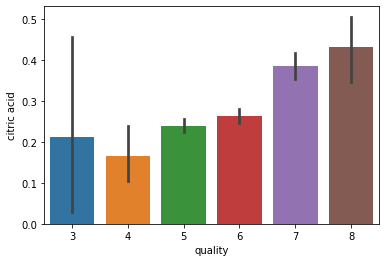

In [33]:
sns.barplot(x='quality',y='citric acid',data=wine)

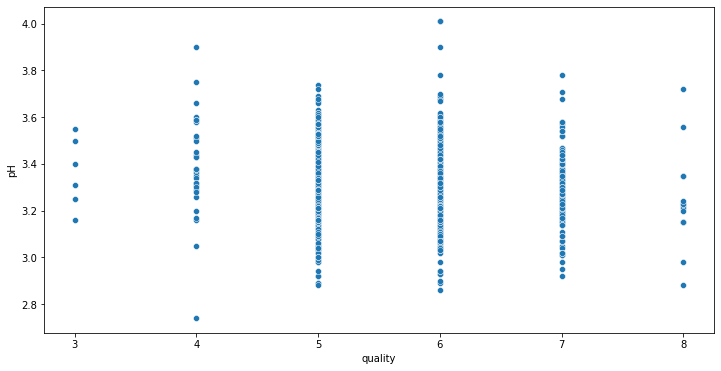

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'quality', y = 'pH',data = wine)
plt.show()

### <i><b><u> Train, Test and Split:

In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(Y.shape ,Y_train.shape,Y_test.shape)

(1143,) (914,) (229,)


### <b><i><u> Model training (Random Forest Classifier Model):

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(X_train, Y_train)

RandomForestClassifier()

### <I><U><B> Model evaluation:

In [27]:
# Accuracy on test data 
X_test_predict  = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict, Y_test)
print("Accuracy ",test_data_accuracy)

Accuracy  0.9213973799126638


### <B><I><U> Predicting the quality:

In [31]:
input_data = [7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08.0.92,0.88]
new_data = np.array(input_data)
reshaped_data = new_data.reshape(1,-1)
prediction = model.predict(reshaped_data)
print(prediction)
if(prediction == 1):
    print("QUALITY OF WINE IS GOOD")
else:
    print("QUALITY OF WINE IS BAD")

SyntaxError: invalid syntax (<ipython-input-31-675f196172b7>, line 1)

## <u>Conclusion:

<p>Based on the bar plots plotted we come to an conclusion 
that not all input features are essential and affect the data, 
for example from the bar plot against quality and residual 
sugar we see that as the quality increases residual sugar is 
moderate and does not have change drastically. So this 
feature is not so essential as compared to others like 
alcohol and citric acid, so we can drop this feature while 
feature selection</p>

<p><b>For classifying the wine quality, we have implemented 
    Random Forest with accuracy of 91.5% </b>.</p>